In [16]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [2]:
(train_data, train_label),_ = imdb.load_data(num_words=10_000)

In [3]:
# multi-hot encoder

mlb = MultiLabelBinarizer(classes=np.array(range(0,10_000)))
X_train = mlb.fit_transform(train_data)

In [4]:
X_train[0]

array([0, 1, 1, ..., 0, 0, 0])

In [11]:
model = keras.Sequential()

model.add(
    Dense(16,
          activation="relu"
         )
)

model.add(
    Dense(16,
          activation="relu"
         )
)

model.add(
    Dense(1,
          activation="sigmoid"
         )
)

model.compile(optimizer='rmsprop'
             ,loss='binary_crossentropy'
              ,metrics=['accuracy']
             )

In [12]:
history_original = model.fit(X_train, train_label
                             , epochs=20, batch_size=512
                             , validation_split=0.4
                            )

Epoch 1/20
30/30 [==============================] - 1s 13ms/step - loss: 0.5145 - accuracy: 0.7787 - val_loss: 0.3770 - val_accuracy: 0.8659
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2937 - accuracy: 0.9055 - val_loss: 0.3044 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2133 - accuracy: 0.9298 - val_loss: 0.2751 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1677 - accuracy: 0.9469 - val_loss: 0.2910 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1363 - accuracy: 0.9565 - val_loss: 0.2873 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1116 - accuracy: 0.9652 - val_loss: 0.3000 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0970 - accuracy: 0.9699 - val_loss: 0.3473 - val_accuracy: 0.8770
Epoch 8/20
30/30 [=

In [5]:
# Regularization model

model = keras.Sequential()

model.add(
    Dense(16,
          kernel_regularizer=regularizers.l2(0.002),
          activation="relu"
         )
)

model.add(
    Dense(16,
          kernel_regularizer=regularizers.l2(0.002),
          activation="relu"
         )
)

model.add(
    Dense(1,
          activation="sigmoid"
         )
)

model.compile(optimizer='rmsprop'
             ,loss='binary_crossentropy'
              ,metrics=['accuracy']
             )

2023-04-18 12:54:22.919431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
history_l2_reg = model.fit(X_train, train_label
                             , epochs=20, batch_size=512
                             , validation_split=0.4
                            )

Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.5824 - accuracy: 0.7813 - val_loss: 0.4472 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3811 - accuracy: 0.8989 - val_loss: 0.3997 - val_accuracy: 0.8698
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3200 - accuracy: 0.9173 - val_loss: 0.3656 - val_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2917 - accuracy: 0.9262 - val_loss: 0.3618 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2741 - accuracy: 0.9313 - val_loss: 0.3529 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2602 - accuracy: 0.9379 - val_loss: 0.3569 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2511 - accuracy: 0.9413 - val_loss: 0.3658 - val_accuracy: 0.8844
Epoch 8/20
30/30 [=

In [14]:
history_l2_reg.history.get('val_loss')

[0.44718021154403687,
 0.39967164397239685,
 0.3655543625354767,
 0.36180248856544495,
 0.3528958559036255,
 0.35690298676490784,
 0.36580684781074524,
 0.4144882261753082,
 0.3703542947769165,
 0.37550219893455505,
 0.37948980927467346,
 0.4019307494163513,
 0.4742089807987213,
 0.4121522903442383,
 0.39803773164749146,
 0.48238736391067505,
 0.4000595211982727,
 0.41791534423828125,
 0.4902295470237732,
 0.4180927276611328]

In [13]:
history_original.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
loss = pd.DataFrame(data=list(zip(history_original.history.get('val_loss'),history_l2_reg.history.get('val_loss'))), columns=['original','regularize'])

<Axes: >

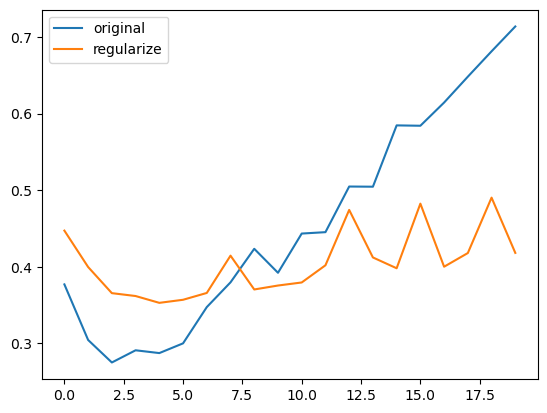

In [22]:
loss.plot()